In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [69]:
obj_colors = {
    'rectangle': sns.color_palette("Set2")[0], 
    'triangle': sns.color_palette("Set2")[1], 
    'asymmetrical': sns.color_palette("Set2")[2], 
}
obj_markers = {
    'rectangle': 's', 
    'triangle': '>', 
    'asymmetrical': 'o',
}

In [65]:
obj_l = list(obj_colors.keys())

# Training Curves

In [66]:
dir_path = 'ConditionedCapsule/training_curves/'

In [67]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

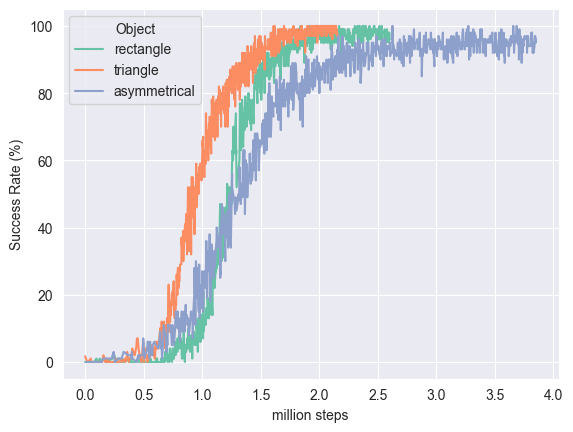

In [68]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['million steps'] = aux_df['Step']/ 1e6
aux_df['Success Rate (%)'] = 100*aux_df['Value']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='million steps', y='Success Rate (%)', hue='Object',  palette=obj_colors)
plt.savefig('ConditionedCapsule/images/training_curves.png',bbox_inches='tight')

# Capsule Width X Success Rate

In [99]:
dir_path = 'ConditionedCapsule/eval_results/'

In [100]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [101]:
grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())

In [102]:
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)

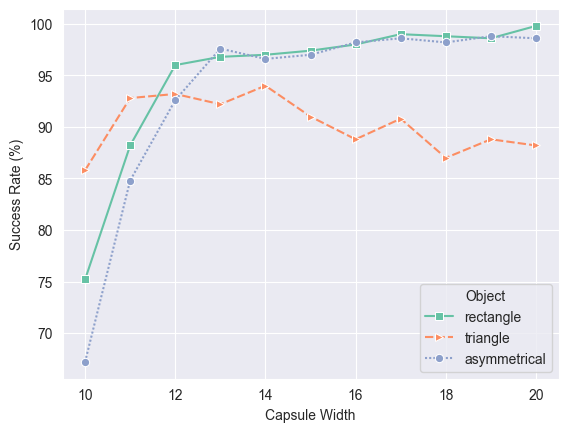

In [103]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object', palette=obj_colors, markers=obj_markers)
plt.savefig('ConditionedCapsule/images/width_x_success.png',bbox_inches='tight')

# Capsule Width x Time, when successful

In [105]:
dir_path = 'ConditionedCapsule/eval_results/'

In [106]:
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [107]:
df = df[df['success']]

In [108]:
grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)

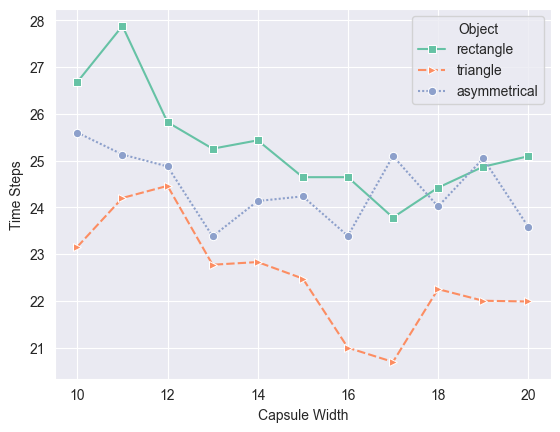

In [109]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Time Steps'] = aux_df['time_steps']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Time Steps', hue='Object', style='Object', palette=obj_colors, markers=obj_markers)
plt.savefig('ConditionedCapsule/images/width_x_time.png',bbox_inches='tight')

# Trajectories in Capsule - Examples